## Домашняя работа №1. Titanik
Дедлайн -- **11.10.18 23:59**

Выполненные задания можно либо присылать на почту gaintseva@phystech.edu, либо загружать в папку в своем репозитории на GitHub. Если загружаете в репозиторий, после загрузки выполненного дз делайте pull request в мой репозиторий или пишите мне в телеграме/на почту, что сделали домашнее задание.

----------------------

В этом задании мы с помощью изученных на семинаре библиотек поиграемся с датасетом Titanik для вот это соренования: https://www.kaggle.com/c/titanic

В этом задании мы не будем тренировать модели и предсказывать результаты, а только научимся работать с данными, обрабатывать из так, чтобы после на них можно было обучать модели машинного обучения. Это пригодится Вам на следующем занятии.

Данные скачивать с сайта не нужно, они уже лежат в папке рядом с этим ноутбуком.

Начем!

In [5]:
pip list


The following command must be run outside of the IPython shell:

    $ pip list

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
%matplotlib inline

### Часть 1. Смотрим на данные

#### Задание 1.1

С помощью библиоткеи pandas загрузите данные из файла train_titanik.csv в память и выведите первые 5 записей на экран:

In [20]:
data = pd.read_csv('train_titanik.csv')
print(type(data))
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0         

Как видно, в данных есть пропуски (NAN), некоторые данные категориальные (не числовые). Как мы помним с предыдущего занятия, чтобы на этих данных можно было обучать модели, нужно заполнить пропуски (избавиться от NaN) и перевести категориальные признаки в числовые. Этим мы и займемся.

#### Задание 1.2

Выделим из данных колонку с ответами (целевой переменной, Y) и в data оставим все остальные колонки

P.S. можно (и желательно) воспользоваться методом drop(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html:

In [21]:
y = data['Survived']
data = data.drop(['Survived'], axis = 1)
print(y.head(5))
print(x.head(5))
print(data.head(5))

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  
   PassengerId  Survived  Pcl

Давайте для начала посмотрим, какие в данных есть колонки и какого типа данные в низ записаны:

In [21]:
print(data.columns)
print(data.dtypes)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


И также посмотрим, в каких столбцах данных содержатся NaN:

In [25]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

#### Задание 1.3

Если хотите, можете посмотреть на связь разных признаков между собой на картинке. Заметьте, что пока мы не перевели категориальные признаки в числовые, мы можем смотреть только на числовые признаки. Давайте, например, посмотрим на связь признаков Age и SibSp 

(подсказка: для этого подойдет функция scatter(), пример ее применения можно найти из семинара или документации matplotlib. Не забудтьте раскрасить точки в 2 цвета в зависимости от значений целевой переменной):

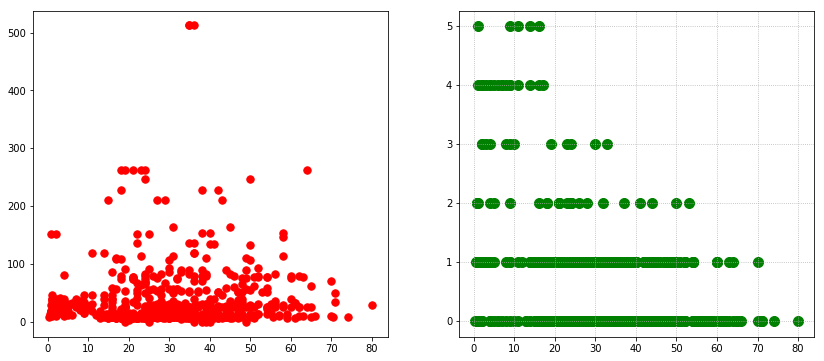

In [34]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['Age'],data['Fare'], c = 'red', s = 55)
plt.subplot(1, 2, 2)
plt.scatter(data['Age'],data['SibSp'], c = 'Green', s = 100)
plt.grid(ls=':')
plt.show()

### Часть 2: Заполнение NaN

Начнем с того, что заполним NaN в колонках, где они есть, какими-нибудь значениями. Для того, чтобы лучше понять, какие значения для пропусков выбрать, полезно посмотреть на данные с точки зрения каких-нибудь статистик (найти среднее по колонке, медиану, самое часто встречающееся значения и т.п.) 

#### 1.
Возраст человека может быть любым чтслом от 0 до \inf. Поэтому, кажется, что для колонки Age смотреть на количество строк с каждым отдельным значеним не имеет смысла. Больший смысл имеет найти значения статистик.

#### Задание 2.1: 
Для колонки Age найдите ее максимальное, минимальное, среднее значения и медиану, напечатайте результаты 

(подсказка: если поиск этих значений работает долго, вспомните, что для np.array() это все будет работать намного быстрее): 

In [42]:
print('Максимальный возраст пассажиров:', data['Age'].max())
print('Минимальный возраст пассажиров:', data['Age'].min())
print('Средний возраст пассажиров:', round(data['Age'].mean(), 2))
print('Медиана возраста пассажиров:', round(data['Age'].median(), 2))

Максимальный возраст пассажиров: 80.0
Минимальный возраст пассажиров: 0.42
Средний возраст пассажиров: 29.7
Медиана возраста пассажиров: 28.0


#### 2. 
Колонка Embarked, наоборот, содержит категориальный признак, который имеет мало разных значений в датасете. Поэтому для него как раз имеет смысл найти количества записей с каждым значением в датасете.

#### Задание 2.2: 
Для колонки Embarked для каждого значения в этой колонке найдите, сколько раз оно встречается. 

(подсказка: Это можно сделать руками, а можно с помощью метода .value_counts())

In [43]:
print(data['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


#### 3.
А вот что делать с колонкой Cabin, сразу непонятно. Она категориальная, и значений в ней много разных. 

#### Задание 2.3: 
Выведите описание столбца Cabin с помощью .describe()

In [44]:
print(data['Cabin'].describe())

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object


#### 4.
Теперь, когда мы видим перед собой больше информации о колонках с NaN, пора эти NaN на что-нибудь заменить. На что -- решать Вам. Не обязательно при этом использовать те величины, которые мы находили в пунктах 2.1 - 2.3.

#### Задание 2.4: 
Заполните пропуски в data отдельно для Age, Embarked и Cabin. Объясните, почему Вы решили заполнить их именно так.

P.S. NaN удобно заменять с помощью метода .fillna() (о нем было на семинаре, можно посмотреть в ноутбуке numpy.ipynb). Обратите внимание, что метод НЕ изменяет объект, к которому был применен, а возвращает новый.

In [46]:
#Возраст решила поменять на средний возраст поссажиров
data['Age'].fillna(data['Age'].mean(), inplace = True)
#Поле Embarked заменю на самое часто встречающееся значение
data['Embarked'].fillna('S', inplace = True)
#Поле Cabin на top 1
data['Cabin'].fillna('C23', inplace = True)

Все, теперь в data не должно быть NaN. Код в ячейке ниже это проверяет. Если он выдал ошибку, значит, Вы не избавились от всех NaN в данных

In [47]:
assert not data.isnull().values.any()

### Часть 3. Перевод категориальных признаков в числа

Как мы помним с лекции, модели (за редким исключением) умеют работать только с числовыми признаками. Поэтому все нечисловые признаки придется превратить в числовые. Этим мы сейчас и займемся.

#### Задание 3.1

Для начала давайте подумаем, что делать с колонкой Name. В ней каждое значение уникальное, и если превращать эти значения в числа, каждому человеку мы поставим в соответствие уникальное число. То есть, получится колонка такая же, как PassengerId. Наверное, нам это не нужно. Поэтому давайте просто удалим эту колонку:

P.S. можно (и желательно) воспользоваться методом drop(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html:

In [50]:
data = data.drop(['Name'], axis = 1)

Посмотрим опять, какие данные у нас остались и что пока получилось:

In [51]:
print(data.head())

   PassengerId  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0            1       3    male  22.0      1      0         A/5 21171   7.2500   
1            2       1  female  38.0      1      0          PC 17599  71.2833   
2            3       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3            4       1  female  35.0      1      0            113803  53.1000   
4            5       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked  
0   C23        S  
1   C85        C  
2   C23        S  
3  C123        S  
4   C23        S  


In [52]:
print(data.columns)
print(data.dtypes)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [53]:
data["Sex"].dtypes == object

True

#### Задание 3.2
Напишите функцию, которая будет превращать колонку с категориальными признаками в колонку с числовыми признаками:

(подсказка: будет работать быстрее, если работать не с pd.DataFrame, а перевести в np.array())

In [70]:
def categorical_to_numeric(column):
    #"""
    #column: колонка значений типа pd.DataFrame
    #функция возвращает np.array() с новыми числовыми значениями этой колонки
    #"""
    dict_values = {}
    i = 0
    unic_values = []
    unic_values = pd.unique(column)
    print(unic_values)
    #создаем словарь соответствий значение - число
    for values in unic_values:
        dict_values.update({values:i})
        i+=1
    itog = np.array(column.map(dict_values))
    return itog

In [71]:
print(categorical_to_numeric(data['Sex']))

['male' 'female']
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 

Переведем колонки и категориальными признаками в числовые с помощью только что написанной Вами функции:

In [72]:
for column in data.columns:
    if data[column].dtypes == object:
        data[column] = categorical_to_numeric(data[column])

['male' 'female']
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 

Теперь в данных в колонках должны быть только чиселки. Код ниже это проверяет:

In [73]:
assert object not in list(data.dtypes), "Ошибка: у Вас в данных все еще есть нечисловые значения!"
assert sorted(list(data.columns)) == sorted(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']), "Ошибка: у Вас в данных не все нужные колонки, Вы где-то что-то потеряли =()"

Ну и посмотрим на получившийся pd.DataFrame:

In [75]:
print(data.head(100))

    PassengerId  Pclass  Sex        Age  SibSp  Parch  Ticket      Fare  \
0             1       3    0  22.000000      1      0       0    7.2500   
1             2       1    1  38.000000      1      0       1   71.2833   
2             3       3    1  26.000000      0      0       2    7.9250   
3             4       1    1  35.000000      1      0       3   53.1000   
4             5       3    0  35.000000      0      0       4    8.0500   
5             6       3    0  29.699118      0      0       5    8.4583   
6             7       1    0  54.000000      0      0       6   51.8625   
7             8       3    0   2.000000      3      1       7   21.0750   
8             9       3    1  27.000000      0      2       8   11.1333   
9            10       2    1  14.000000      1      0       9   30.0708   
10           11       3    1   4.000000      1      1      10   16.7000   
11           12       1    1  58.000000      0      0      11   26.5500   
12           13       3  

In [76]:
print(data.describe())

       PassengerId      Pclass         Sex         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    2.308642    0.352413   29.699118    0.523008   
std     257.353842    0.836071    0.477990   13.002015    1.102743   
min       1.000000    1.000000    0.000000    0.420000    0.000000   
25%     223.500000    2.000000    0.000000   22.000000    0.000000   
50%     446.000000    3.000000    0.000000   29.699118    0.000000   
75%     668.500000    3.000000    1.000000   35.000000    1.000000   
max     891.000000    3.000000    1.000000   80.000000    8.000000   

            Parch      Ticket        Fare       Cabin    Embarked  
count  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.381594  306.859708   32.204208   15.527497    0.361392  
std      0.806057  197.286045   49.693429   34.996694    0.635673  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000  135.000000

Все, теперь необходимая предобработка данных перед тем, как обучать модель, закончена. Хотя это не значит, что эта предобработка была достаточной. На следующем занятии мы попробуем сделать предобработку еще лучше.

И теперь можно с помощью plt.scatter из задания 1.3 выводить на экран зависимости всех столбцов, а не только тех, которые изначально были числовыми. 

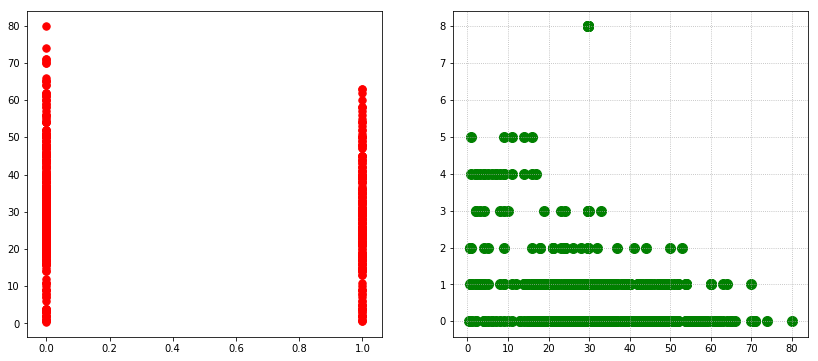

In [79]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['Sex'],data['Age'], c = 'red', s = 55)
plt.subplot(1, 2, 2)
plt.scatter(data['Age'],data['SibSp'], c = 'Green', s = 100)
plt.grid(ls=':')
plt.show()

-------------------------------

#### Задание*

Для тех, кто на прошлом занятии игрался с knn.ipynb, предлагается применить knn к полученным данным, а потом получить ответы на данные из test_titakin.csv и загрузить в соревнование: https://www.kaggle.com/c/titanic. Какой результат получился и при каких k?